In [110]:
import ssl
import sys
import json
import random
import time
import paho.mqtt.client as mqtt
import paho.mqtt.publish
import numpy
import datetime
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
%matplotlib inline

In [111]:
conn = psycopg2.connect(host = 'localhost', user= 'postgres', password ='arturo19', dbname= 'proyecto1')

In [112]:
dataFrame = pd.read_sql('SELECT * FROM usuarios', conn)
df = pd.DataFrame(dataFrame, columns=['id','cedula','edad','sexo','macaddress'])
df.head(25)

,id,cedula,edad,sexo,macaddress
0,1.0,27346026.0,NaN,None,None
1,2.0,6821384.0,NaN,None,None
2,3.0,333.0,NaN,None,None
3,78.0,42253918.0,62.0,Masculino,None
4,79.0,30531151.0,33.0,Masculino,1c:14:2a:0c:c3:03
5,80.0,22053799.0,71.0,Masculino,37:10:31:26:bf:7c
6,90.0,25217291.0,61.0,Masculino,74:01:21:09:b2:d1
7,94.0,34069086.0,64.0,Masculino,None
8,95.0,41500193.0,37.0,Femenino,49:04:37:04:7b:4f
9,97.0,48696539.0,29.0,Femenino,None


In [113]:
def porcentaje_ventas_tlf():
    cur = conn.cursor()
    cur.execute("SELECT * FROM porcentaje_ventas_tlf")
    rows = cur.fetchall()
    ventas = []
    for row in rows:
        ventas.append(row)
    return ventas

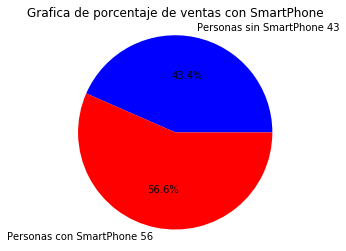

In [114]:
contlf = ' '.join(["Personas con SmartPhone",str(porcentaje_ventas_tlf()[0][1])])
sintlf = ' '.join(["Personas sin SmartPhone",str(porcentaje_ventas_tlf()[0][0])])

ventas = (sintlf,contlf)
slices = (porcentaje_ventas_tlf()[0][0],porcentaje_ventas_tlf()[0][1])
colores= ("blue","red")

plt.pie(slices, colors=colores, labels=ventas, autopct='%1.1f%%')
plt.axis("scaled")
plt.title("Grafica de porcentaje de ventas con SmartPhone")
plt.show()

In [115]:
dataFrame = pd.read_sql('SELECT * FROM entradas', conn)
df = pd.DataFrame(dataFrame, columns=['macaddress','horaentrada','horasalida','camaraentrada','camarasalida'])
df.head(25)

,macaddress,horaentrada,horasalida,camaraentrada,camarasalida
0,None,None,None,-1,-1
1,14:0d:0d:70:02:03,2019-06-08 12:56:21.666580,2019-06-08 17:18:21.666580,7,2
2,None,None,None,-1,-1
3,58:15:17:20:4b:d5,2019-06-08 12:24:16.676851,2019-06-08 18:35:16.676851,3,5
4,36:0b:1e:4f:3c:7d,2019-06-08 13:23:11.193659,2019-06-08 18:08:11.193659,5,5
5,None,None,None,-1,-1
6,32:0c:28:4a:30:af,2019-06-08 12:20:05.369680,2019-06-08 15:40:05.369680,4,7
7,44:02:2c:4c:01:75,2019-06-08 13:26:47.879343,2019-06-08 17:03:47.879343,1,7
8,1f:0b:15:5a:a1:99,2019-06-08 13:17:50.389275,2019-06-08 20:05:50.389275,8,5
9,5e:11:2c:7e:d0:2a,2019-06-08 14:09:49.922913,2019-06-08 21:14:49.922913,3,2


In [116]:
def top_usuarios_recientes():
    cur = conn.cursor()
    cur.execute("SELECT * FROM top_usuarios_recientes")
    rows = cur.fetchall()
    entradas = []
    for row in rows:
        entradas.append(row)
    return entradas

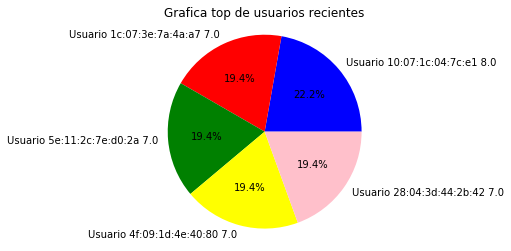

In [117]:
persona1 = ' '.join(["Usuario",str(top_usuarios_recientes()[0][0]), str(top_usuarios_recientes()[0][1])])
persona2 = ' '.join(["Usuario",str(top_usuarios_recientes()[1][0]), str(top_usuarios_recientes()[1][1])])
persona3 = ' '.join(["Usuario",str(top_usuarios_recientes()[2][0]), str(top_usuarios_recientes()[2][1])])
persona4 = ' '.join(["Usuario",str(top_usuarios_recientes()[3][0]), str(top_usuarios_recientes()[3][1])])
persona5 = ' '.join(["Usuario",str(top_usuarios_recientes()[4][0]), str(top_usuarios_recientes()[4][1])])

entradas = (persona1, persona2, persona3, persona4, persona5)

slices = (top_usuarios_recientes()[0][1],
          top_usuarios_recientes()[1][1],
          top_usuarios_recientes()[2][1],
          top_usuarios_recientes()[3][1],
          top_usuarios_recientes()[4][1])

colores= ("blue","red","green","yellow","pink")

plt.pie(slices, colors=colores, labels=entradas, autopct='%1.1f%%')
plt.axis("scaled")
plt.title("Grafica top de usuarios recientes")
plt.show()

In [118]:
dataFrame = pd.read_sql('SELECT * FROM mesasferias', conn)
df = pd.DataFrame(dataFrame, columns=['usuariomacaddress','mesa','minutos'])
df.head(25)

,usuariomacaddress,mesa,minutos
0,28:02:26:58:2b:d5,4,53.0
1,3e:0b:0d:06:1b:cb,5,64.0
2,None,2,-1.0
3,None,1,-1.0
4,None,3,-1.0
5,35:0f:07:68:59:d9,1,64.0
6,None,5,-1.0
7,None,5,-1.0
8,28:04:3d:44:2b:42,4,39.0
9,1a:09:2c:59:8d:07,2,31.0


In [119]:
def ver_mesas_mas_tiempo_usado():
    cur = conn.cursor()
    cur.execute("SELECT * FROM ver_mesas_mas_tiempo_usado")
    rows = cur.fetchall()
    mesas = []
    for row in rows:
        mesas.append(row)
    return mesas

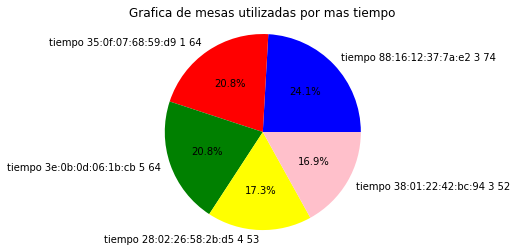

In [120]:
mesa1 = ' '.join(["tiempo",str(ver_mesas_mas_tiempo_usado()[0][0]), 
                           str(ver_mesas_mas_tiempo_usado()[0][1]), 
                           str(ver_mesas_mas_tiempo_usado()[0][2])])

mesa2 = ' '.join(["tiempo",str(ver_mesas_mas_tiempo_usado()[1][0]),
                           str(ver_mesas_mas_tiempo_usado()[1][1]), 
                           str(ver_mesas_mas_tiempo_usado()[1][2])])

mesa3 = ' '.join(["tiempo",str(ver_mesas_mas_tiempo_usado()[2][0]), 
                           str(ver_mesas_mas_tiempo_usado()[2][1]), 
                           str(ver_mesas_mas_tiempo_usado()[2][2])])

mesa4 = ' '.join(["tiempo",str(ver_mesas_mas_tiempo_usado()[3][0]), 
                          str(ver_mesas_mas_tiempo_usado()[3][1]), 
                          str(ver_mesas_mas_tiempo_usado()[3][2])])

mesa5 = ' '.join(["tiempo",str(ver_mesas_mas_tiempo_usado()[4][0]),
                           str(ver_mesas_mas_tiempo_usado()[4][1]), 
                           str(ver_mesas_mas_tiempo_usado()[4][2])])

mesas = (mesa1, mesa2, mesa3, mesa4, mesa5)

slices = (ver_mesas_mas_tiempo_usado()[0][2],
          ver_mesas_mas_tiempo_usado()[1][2],
          ver_mesas_mas_tiempo_usado()[2][2],
          ver_mesas_mas_tiempo_usado()[3][2],
          ver_mesas_mas_tiempo_usado()[4][2])

colores= ("blue","red","green","yellow","pink")

plt.pie(slices, colors=colores, labels=mesas, autopct='%1.1f%%')
plt.axis("scaled")
plt.title("Grafica de mesas utilizadas por mas tiempo")
plt.show()

In [129]:
dataFrame = pd.read_sql('SELECT * FROM tiendas', conn)
df = pd.DataFrame(dataFrame, columns=['id','nombre'])
df.head(25)

,id,nombre
0,1,Zara
1,2,GameStop
2,3,Beco
3,4,Nike
4,5,Adidas


In [122]:
def ver_tiendas_mas_items_vendidos():
    cur = conn.cursor()
    cur.execute("SELECT * FROM ver_tiendas_mas_items_vendidos")
    rows = cur.fetchall()
    tiendas = []
    for row in rows:
        tiendas.append(row)
    return tiendas

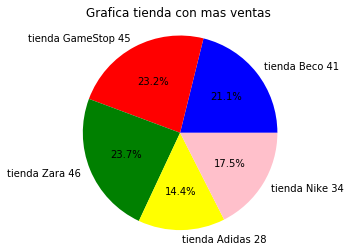

In [128]:
tienda1 = ' '.join(["tienda",str(ver_tiendas_mas_items_vendidos()[0][0]), str(ver_tiendas_mas_items_vendidos()[0][1])])
tienda2 = ' '.join(["tienda",str(ver_tiendas_mas_items_vendidos()[1][0]), str(ver_tiendas_mas_items_vendidos()[1][1])])
tienda3 = ' '.join(["tienda",str(ver_tiendas_mas_items_vendidos()[2][0]), str(ver_tiendas_mas_items_vendidos()[2][1])])
tienda4 = ' '.join(["tienda",str(ver_tiendas_mas_items_vendidos()[3][0]), str(ver_tiendas_mas_items_vendidos()[3][1])])
tienda5 = ' '.join(["tienda",str(ver_tiendas_mas_items_vendidos()[4][0]), str(ver_tiendas_mas_items_vendidos()[4][1])])

tiendas = (tienda1, tienda2, tienda3, tienda4, tienda5)

slices = (ver_tiendas_mas_items_vendidos()[0][1],
          ver_tiendas_mas_items_vendidos()[1][1],
          ver_tiendas_mas_items_vendidos()[2][1],
          ver_tiendas_mas_items_vendidos()[3][1],
          ver_tiendas_mas_items_vendidos()[4][1])

colores= ("blue","red","green","yellow","pink")

plt.pie(slices, colors=colores, labels=tiendas, autopct='%1.1f%%')
plt.axis("scaled")
plt.title("Grafica tienda con mas ventas")
plt.show()

In [124]:
dataFrame = pd.read_sql('SELECT * FROM compras', conn)
df = pd.DataFrame(dataFrame, columns=['id','comprastiendaid','usuariocedula','itemmonto','itemid','comprasusuariomacaddress'])
df.head(25)

,id,comprastiendaid,usuariocedula,itemmonto,itemid,comprasusuariomacaddress
0,8,4,22053799,9761.0,367,37:10:31:26:bf:7c
1,9,2,25217291,5146.0,153,74:01:21:09:b2:d1
2,10,1,25217291,9789.0,541,74:01:21:09:b2:d1
3,11,1,41500193,6677.0,198,49:04:37:04:7b:4f
4,12,2,41500193,9736.0,501,49:04:37:04:7b:4f
5,13,3,41500193,8702.0,848,49:04:37:04:7b:4f
6,14,1,48696539,5182.0,439,None
7,15,3,48696539,7643.0,863,None
8,16,3,48696539,9907.0,877,None
9,17,2,32213106,5291.0,46,None


In [125]:
def ver_usuarios_mas_compras():
    cur = conn.cursor()
    cur.execute("SELECT * FROM ver_usuarios_mas_compras")
    rows = cur.fetchall()
    usuarios = []
    for row in rows:
        usuarios.append(row)
    return usuarios

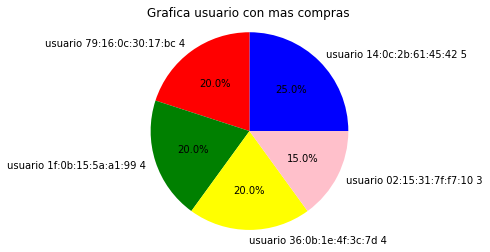

In [126]:
usuario1 = ' '.join(["usuario",str(ver_usuarios_mas_compras()[0][1]), str(ver_usuarios_mas_compras()[0][0])])
usuario2 = ' '.join(["usuario",str(ver_usuarios_mas_compras()[1][1]), str(ver_usuarios_mas_compras()[1][0])])
usuario3 = ' '.join(["usuario",str(ver_usuarios_mas_compras()[2][1]), str(ver_usuarios_mas_compras()[2][0])])
usuario4 = ' '.join(["usuario",str(ver_usuarios_mas_compras()[3][1]), str(ver_usuarios_mas_compras()[3][0])])
usuario5 = ' '.join(["usuario",str(ver_usuarios_mas_compras()[4][1]), str(ver_usuarios_mas_compras()[4][0])])

usuarios = (usuario1, usuario2, usuario3, usuario4, usuario5)

slices = (
          ver_usuarios_mas_compras()[0][0],
          ver_usuarios_mas_compras()[1][0],
          ver_usuarios_mas_compras()[2][0],
          ver_usuarios_mas_compras()[3][0],
          ver_usuarios_mas_compras()[4][0]
          )

colores= ("blue","red","green","yellow","pink")

plt.pie(slices, colors=colores, labels=usuarios, autopct='%1.1f%%')
plt.axis("scaled")
plt.title("Grafica usuario con mas compras")
plt.show()